# YOLO_v3 Colab

* YOLO는 객체 검출(Object Detection)의 대표적인 방법 중 하나
* 워싱턴대 대학원생 Joseph Redmon이 개발
<br>
<br>
https://github.com/AlexeyAB/darknet#custom-object-detection 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. CUDA Version & GPU Check

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [3]:
!nvidia-smi 

Wed Feb  1 05:37:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# II. cudnn Version Check

> ## 1) cudnn Library Version Check

In [4]:
!ls -l /usr/local

total 52
drwxr-xr-x 1 root root 4096 Jan 30 14:52 bin
drwxr-xr-x 3 root root 4096 Jan 30 14:52 colab
lrwxrwxrwx 1 root root   22 Jan 30 14:33 cuda -> /etc/alternatives/cuda
lrwxrwxrwx 1 root root   25 Jan 30 14:33 cuda-11 -> /etc/alternatives/cuda-11
drwxr-xr-x 1 root root 4096 Jan 30 14:31 cuda-11.2
drwxr-xr-x 1 root root 4096 Jan 30 14:47 etc
drwxr-xr-x 2 root root 4096 Oct 19 16:47 games
drwxr-xr-x 2 root root 4096 Jan 30 14:45 _gcs_config_ops.so
drwxr-xr-x 1 root root 4096 Jan 30 14:46 include
drwxr-xr-x 1 root root 4096 Jan 30 14:46 lib
drwxr-xr-x 3 root root 4096 Jan 30 14:45 licensing
lrwxrwxrwx 1 root root    9 Oct 19 16:47 man -> share/man
drwxr-xr-x 2 root root 4096 Oct 19 16:49 sbin
drwxr-xr-x 1 root root 4096 Jan 30 14:46 share
drwxr-xr-x 2 root root 4096 Oct 19 16:47 src
drwxr-xr-x 2 root root 4096 Jan 30 14:46 xgboost


# III. Custom Data_Set

> ## Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> ## 1) 'custom_data' & 'darknet' 설치경로 설정

In [ ]:
!mkdir /content/yolo_custom_modeling 

In [ ]:
%cd /content/yolo_custom_modeling

/content/yolo_custom_modeling


> ## 2) 학습 데이터 Upload

In [ ]:
!ls -l '/content/drive/MyDrive/Mask_dataset/maskdataset_3C.zip'

-rw------- 1 root root 416855316 Jan 30 16:05 /content/drive/MyDrive/Mask_dataset/maskdataset_3C.zip


In [ ]:
!unzip '/content/drive/MyDrive/Mask_dataset/maskdataset_3C.zip'

Archive:  /content/drive/MyDrive/Mask_dataset/maskdataset_3C.zip
   creating: maskdataset_3C/
  inflating: maskdataset_3C/creating-files-data-and-name.py  
  inflating: maskdataset_3C/creating-train-and-test-txt-files.py  
   creating: maskdataset_3C/dataset/
   creating: maskdataset_3C/dataset/images/
  inflating: maskdataset_3C/dataset/images/maksssksksss0.png  
  inflating: maskdataset_3C/dataset/images/maksssksksss1.png  
  inflating: maskdataset_3C/dataset/images/maksssksksss10.png  
  inflating: maskdataset_3C/dataset/images/maksssksksss100.png  
  inflating: maskdataset_3C/dataset/images/maksssksksss101.png  
  inflating: maskdataset_3C/dataset/images/maksssksksss102.png  
  inflating: maskdataset_3C/dataset/images/maksssksksss103.png  
  inflating: maskdataset_3C/dataset/images/maksssksksss104.png  
  inflating: maskdataset_3C/dataset/images/maksssksksss105.png  
  inflating: maskdataset_3C/dataset/images/maksssksksss106.png  
  inflating: maskdataset_3C/dataset/images/maksssks

In [ ]:
!mv /content/yolo_custom_modeling/maskdataset_3C/* /content/yolo_custom_modeling

In [ ]:
!rm -rf /content/yolo_custom_modeling/maskdataset_3C

In [ ]:
!ls -l '/content/yolo_custom_modeling'

total 12
-rw-r--r-- 1 root root 2523 Jan 29 10:31 creating-files-data-and-name.py
-rw-r--r-- 1 root root 3024 Jan 29 22:42 creating-train-and-test-txt-files.py
drwxr-xr-x 5 root root 4096 Jan 29 12:14 dataset


# IV. Train vs. Test Split Setting

In [ ]:
!pwd

/content/yolo_custom_modeling


In [ ]:
classes_text = """mask
w_mask
no_mask"""

with open("/content/yolo_custom_modeling/dataset/classes.txt", 'w') as file:
    file.write(classes_text)

%cat /content/yolo_custom_modeling/dataset/classes.txt

mask
w_mask
no_mask

In [ ]:
from glob import glob

img_list = glob('/content/yolo_custom_modeling/dataset/images/*.png')
txt_list = glob('/content/yolo_custom_modeling/dataset/labels/*.txt')

print('IMG_LIST : ', len(img_list))
print('TXT_LIST : ', len(txt_list))

IMG_LIST :  843
TXT_LIST :  843


In [ ]:
# about 100 sec

for a in txt_list:
  !mv {a} /content/yolo_custom_modeling/dataset/images

In [ ]:
txt_list = glob('/content/yolo_custom_modeling/dataset/labels/*.txt')

print('TXT_LIST : ', len(txt_list))

TXT_LIST :  0


In [ ]:
!rm -r /content/yolo_custom_modeling/dataset/labels

> ## 1) 'labelled_data.data' 파일 생성

In [ ]:
!python creating-files-data-and-name.py

In [ ]:
!ls -l dataset/labelled_data.data 

-rw-r--r-- 1 root root 107 Jan 31 01:55 dataset/labelled_data.data


> ## 2) train 및 test 데이터 분류 파일 생성

* 7 : 3

In [ ]:
!python creating-train-and-test-txt-files.py

In [ ]:
!ls -l dataset/*.txt

-rw-r--r-- 1 root root    19 Jan 31 01:53 dataset/classes.txt
-rw-r--r-- 1 root root 20563 Jan 31 01:55 dataset/test.txt
-rw-r--r-- 1 root root 20623 Jan 31 01:55 dataset/train.txt


# V. 'darknet' Setting

> ## 1) 'darknet' Clone

In [ ]:
!pwd 

/content/yolo_custom_modeling


In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git 

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 14.37 MiB/s, done.
Resolving deltas: 100% (10403/10403), done.


In [ ]:
%ls -l

total 16
-rw-r--r--  1 root root 2523 Jan 29 10:31 creating-files-data-and-name.py
-rw-r--r--  1 root root 3024 Jan 29 22:42 creating-train-and-test-txt-files.py
drwxr-xr-x 14 root root 4096 Jan 31 01:57 darknet/
drwxr-xr-x  4 root root 4096 Jan 31 01:55 dataset/


> ## 2) 'Makefile' Configuration

In [ ]:
%cd darknet/

/content/yolo_custom_modeling/darknet


In [ ]:
!ls -l Makefile

-rw-r--r-- 1 root root 5961 Jan 31 01:57 Makefile


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

> ## 3) 'darknet' Installation

* 100초

In [ ]:
%%time

!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (i

# VI. 'darknet' Learning


In [ ]:
!pwd

/content/yolo_custom_modeling/darknet


> ## 1) 실행권한 설정

In [ ]:
!ls -l darknet

-rwxr-xr-x 1 root root 6714368 Jan 31 01:58 darknet


In [ ]:
!chmod +x darknet

* Configuration Check

In [ ]:
!./darknet detector

 CUDA-version: 11020 (11060), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
usage: ./darknet detector [train/test/valid/demo/map] [data] [cfg] [weights (optional)]


> ## 2) 실행환경 설정

* 1) backup 폴더 생성

* 2) 아래 파일을 image 디렉토리에 위치
 - yolov3-tiny-custom.cfg

In [ ]:
!pwd 

/content/yolo_custom_modeling/darknet


In [ ]:
%cd ..

/content/yolo_custom_modeling


In [ ]:
!mkdir backup

In [ ]:
!ls -l

total 20
drwxr-xr-x  2 root root 4096 Jan 31 01:59 backup
-rw-r--r--  1 root root 2523 Jan 29 10:31 creating-files-data-and-name.py
-rw-r--r--  1 root root 3024 Jan 29 22:42 creating-train-and-test-txt-files.py
drwxr-xr-x 16 root root 4096 Jan 31 01:58 darknet
drwxr-xr-x  4 root root 4096 Jan 31 01:55 dataset


In [ ]:
!ls -l dataset/labelled_data.data

-rw-r--r-- 1 root root 107 Jan 31 01:55 dataset/labelled_data.data


In [ ]:
!ls -l dataset/yolov3-tiny-custom.cfg

-rw-r--r-- 1 root root 1988 Jan 31 01:04 dataset/yolov3-tiny-custom.cfg


> ## 3) 학습 실행

* 120분
 - 6000 epochs

In [ ]:
%%time

!darknet/darknet detector train dataset/labelled_data.data dataset/yolov3-tiny-custom.cfg -map -dont_show # yolov3-tiny.conv.11 지원 x

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 total_bbox = 1506467, rewritten_bbox = 0.319954 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.804550), count: 5, class_loss = 0.244271, iou_loss = 0.138300, total_loss = 0.382571 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.822401), count: 8, class_loss = 0.339662, iou_loss = 0.220625, total_loss = 0.560287 
 total_bbox = 1506480, rewritten_bbox = 0.319951 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.847094), count: 4, class_loss = 0.446656, iou_loss = 0.136389, total_loss = 0.583045 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.000000), count: 1, class_loss = 0.000098, iou_loss = 0.000000, total_loss = 0.000098 
 total_bbox = 1506484, rewritten_bbox = 0.319950 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.830535), count: 8, class_loss = 0.260799, iou_loss = 0

> ## 4) 학습된 모델 확인

* yolov3-tiny-custom_final.weights

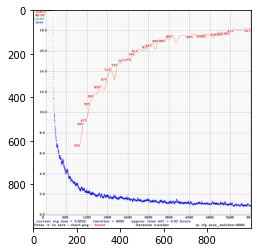

In [ ]:
from IPython.display import Image

Image('chart.png')

In [ ]:
%cd darknet/

/content/yolo_custom_modeling/darknet


In [ ]:
!ls -l ../backup

total 305208
-rw-r--r-- 1 root root 34723476 Jan 31 02:17 yolov3-tiny-custom_1000.weights
-rw-r--r-- 1 root root 34723476 Jan 31 02:36 yolov3-tiny-custom_2000.weights
-rw-r--r-- 1 root root 34723476 Jan 31 02:55 yolov3-tiny-custom_3000.weights
-rw-r--r-- 1 root root 34723476 Jan 31 03:14 yolov3-tiny-custom_4000.weights
-rw-r--r-- 1 root root 34723476 Jan 31 03:34 yolov3-tiny-custom_5000.weights
-rw-r--r-- 1 root root 34723476 Jan 31 03:53 yolov3-tiny-custom_6000.weights
-rw-r--r-- 1 root root 34723476 Jan 31 03:53 yolov3-tiny-custom_best.weights
-rw-r--r-- 1 root root 34723476 Jan 31 03:53 yolov3-tiny-custom_final.weights
-rw-r--r-- 1 root root 34723476 Jan 31 03:53 yolov3-tiny-custom_last.weights


# VII. 학습결과 확인

> ## 1) 'coco.names' Update

* 아래 내용으로 수정 후 진행

 - no_mask
 - mask

In [ ]:
!cp -f /content/yolo_custom_modeling/dataset/classes.names /content/yolo_custom_modeling/darknet/data/coco.names

> ## 2) Object Detection 실행

In [ ]:
# -- mask_test는 1~10까지 임의로 변경하며 테스트 가능
# yolov3-tiny-custom.cfg 에서 Testing의 batch, subdivisions 주석 해제, Training에 주석 달기 
!./darknet detect ../dataset/yolov3-tiny-custom.cfg ../backup/yolov3-tiny-custom_last.weights ../dataset/test/mask_test_1.png

 CUDA-version: 11020 (11060), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128

> ## 3) Object Detection 결과 확인

In [ ]:
%pwd

'/content/yolo_custom_modeling/darknet'

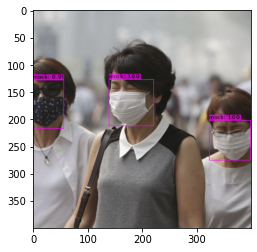

In [ ]:
import matplotlib.image as img 
import matplotlib.pyplot as pp 

fileName = 'predictions.jpg' 

ndarray = img.imread(fileName) 

pp.imshow(ndarray) 
pp.show()

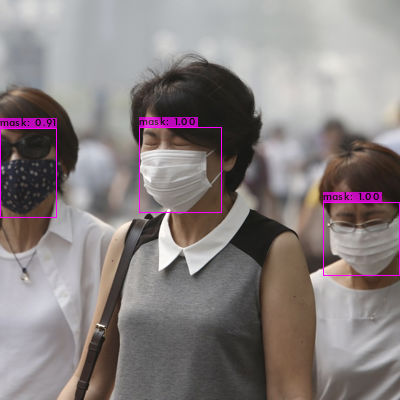

In [ ]:
from IPython.display import Image

Image('predictions.jpg')

# 
# 
# 
# The End
# 
# 
# 